
### **Clean Energy: The Energy Source of the Future?**
### **Group 7**

1. Minhee Kwon
2. Udit Bhandari
3. Dewan Choudhury
3. Atabay Kadiroglu
5. Yu Zhang



In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import datetime
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

# How climate has been changing and Global Warming


## Change in Average Temperature by Decade Worldwide from 1880 to 2020

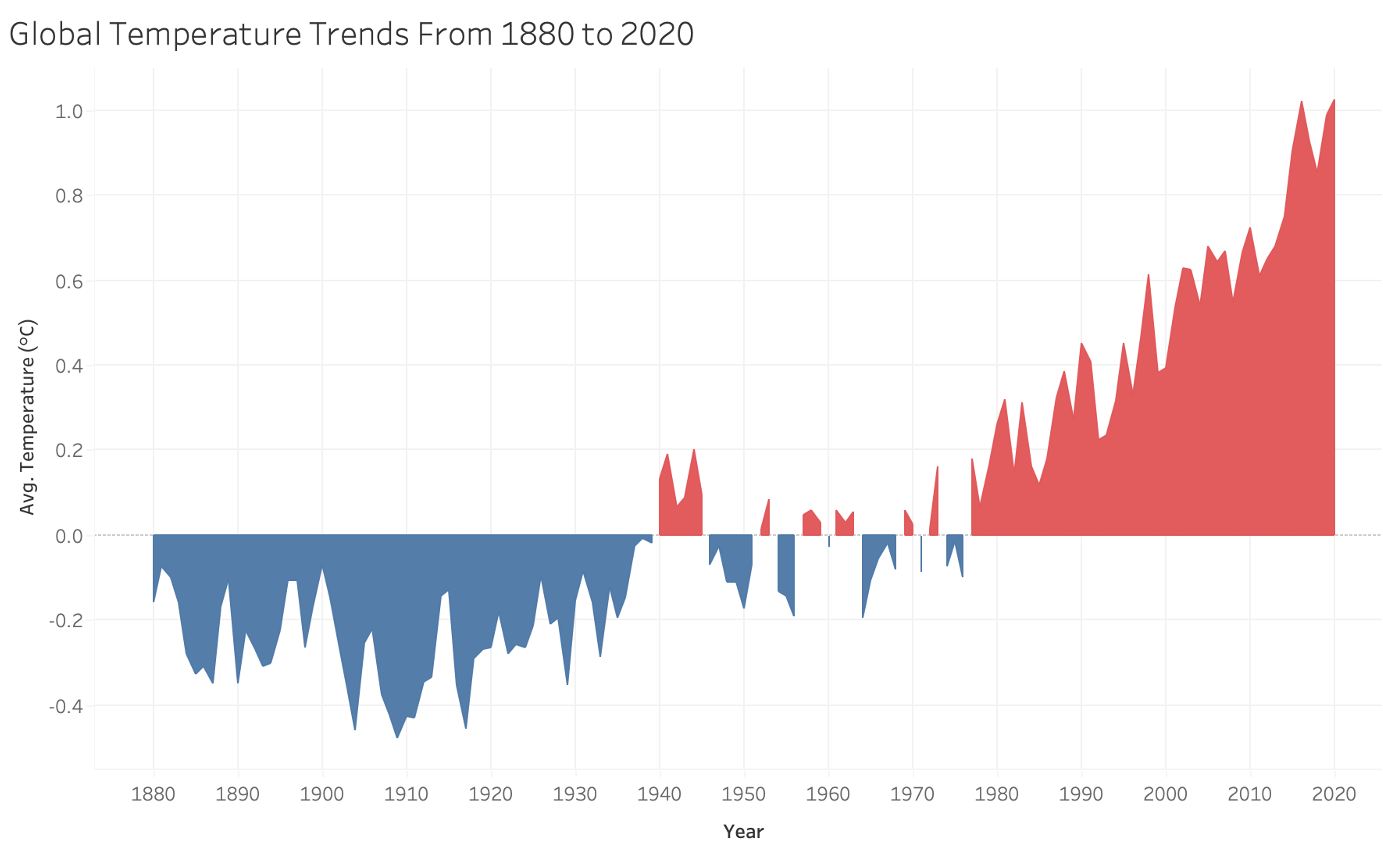

In [144]:
Image('Global Temperature Trends.png', width=800, height=600)

Decade by decade, global temperatures continue to rise.
In the graph, the years from 1880 to 1939 tend to appear cooler (more blues than reds), growing less cool into the 1950s.

https://public.tableau.com/app/profile/minhee.kwon/viz/GlobalTemperatureTableau/Sheet1?publish=yes

## Global Temperature Change by Continents

In [145]:
import pandas as pd
df = pd.read_csv('global-regional-temperature-change-by-decade-1910-2019.csv')
display(df)

,Year,Asia,Africa,North America,Europe,South America,Oceania
0,1910,-0.47,-0.32,-0.54,-0.33,-0.46,-0.24
1,1920,-0.26,-0.23,-0.21,-0.23,-0.51,-0.30
2,1930,-0.18,-0.07,0.07,0.14,-0.23,-0.19
3,1940,-0.02,0.00,0.18,-0.15,-0.02,-0.27
4,1950,-0.18,-0.15,0.00,-0.02,-0.04,-0.11
5,1960,-0.06,-0.06,-0.15,-0.04,0.09,-0.01
6,1970,0.07,0.00,-0.19,-0.03,0.13,0.14
7,1980,0.34,0.29,0.29,0.02,0.40,0.42
8,1990,0.69,0.49,0.49,0.52,0.61,0.53
9,2000,1.14,0.81,0.82,1.05,0.79,0.73


**Temperatures have risen** in the last 100 years around the world. In the 1910s, North America had an average temperature some 0.54 degrees Celsius lower than average temperatures between 1910 and 2000. In the most recent decade, this region experienced temperatures 1.19 degrees Celsius over the average.
All global regions (excluding Oceania) experienced an increased temperature over one degree Celsius in the 2010s, compared to the average between 1910 and 2000.

## CO2 Emissions By Year

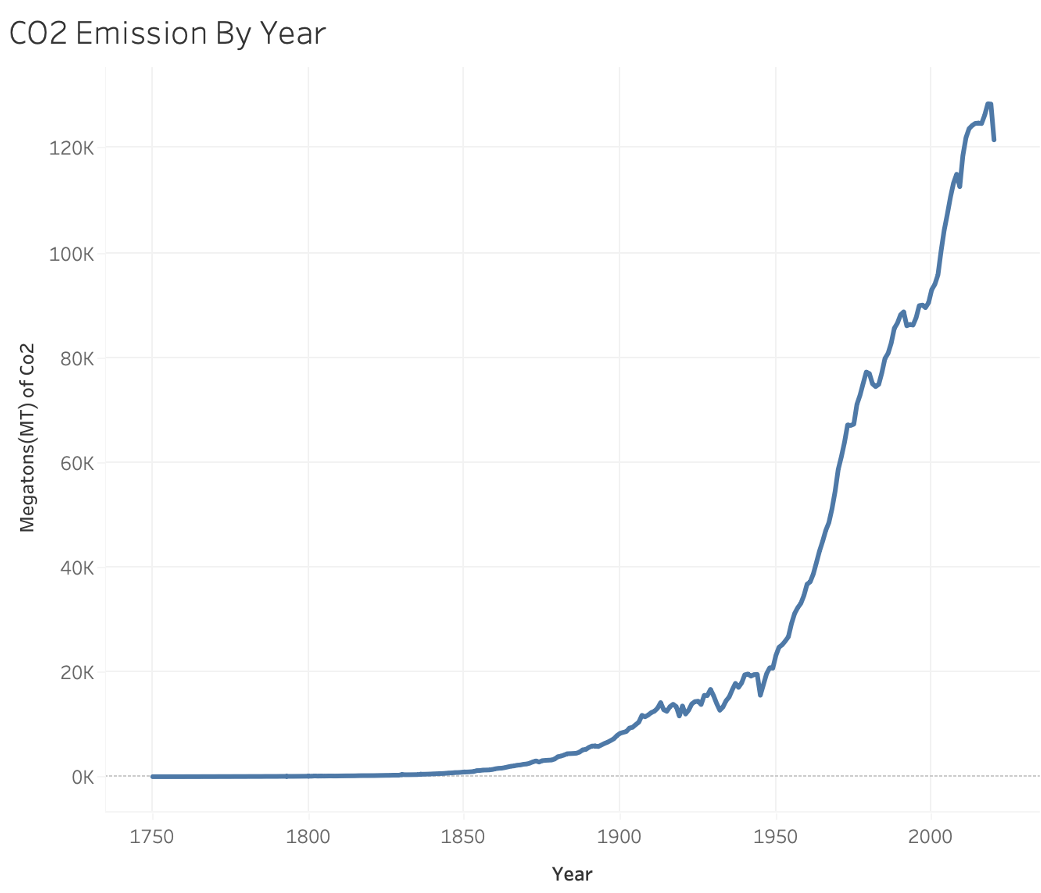

In [146]:
Image("CO2 Emission By Year.png", width=800, height=600)

Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.

**Carbon dioxide emissions**, largely by-products of energy production and use, account for the largest share of greenhouse gases, which are associated with global warming.

## CO2 Emissions Worldwide Map

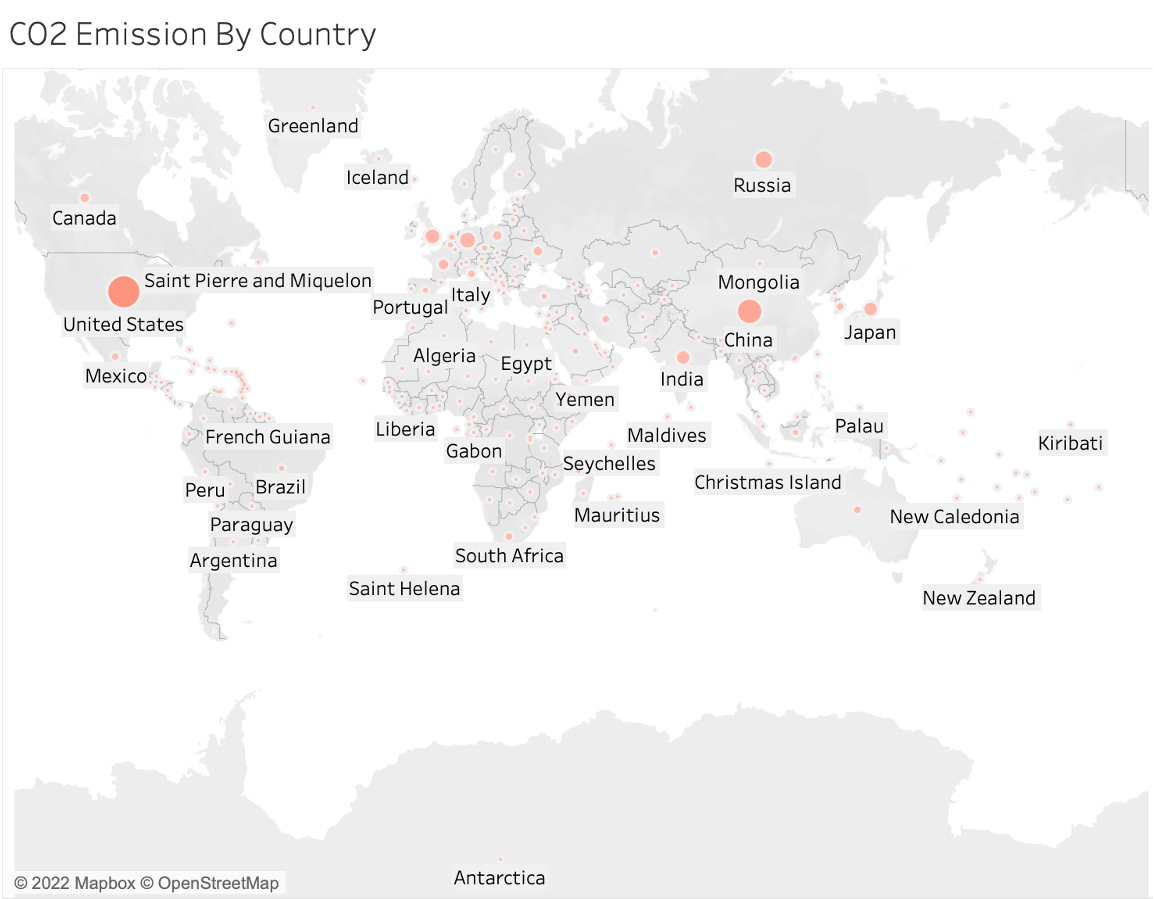

In [147]:
Image("CO2 Emission.png", width=800, height=600)

## CO2 Emissions By Country

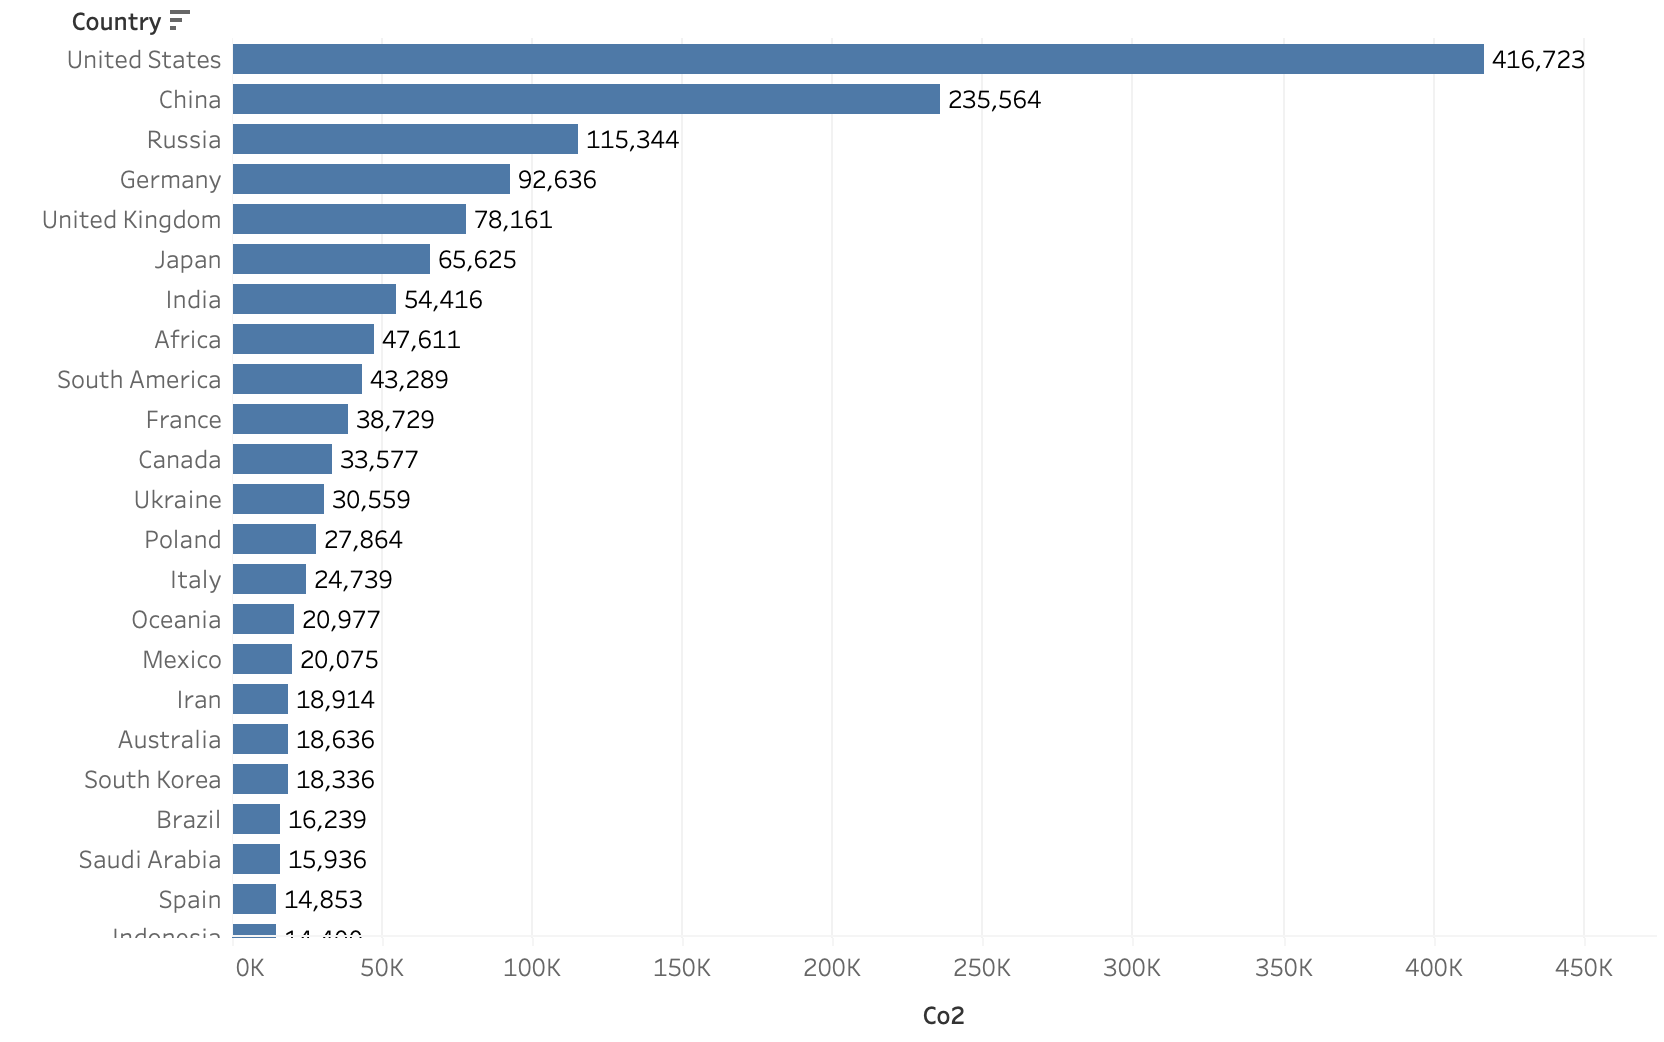

In [148]:
Image("CO2 Emission Worldwide.png", width=800, height=600)

## Top 4 Countries By CO2 Emissions 

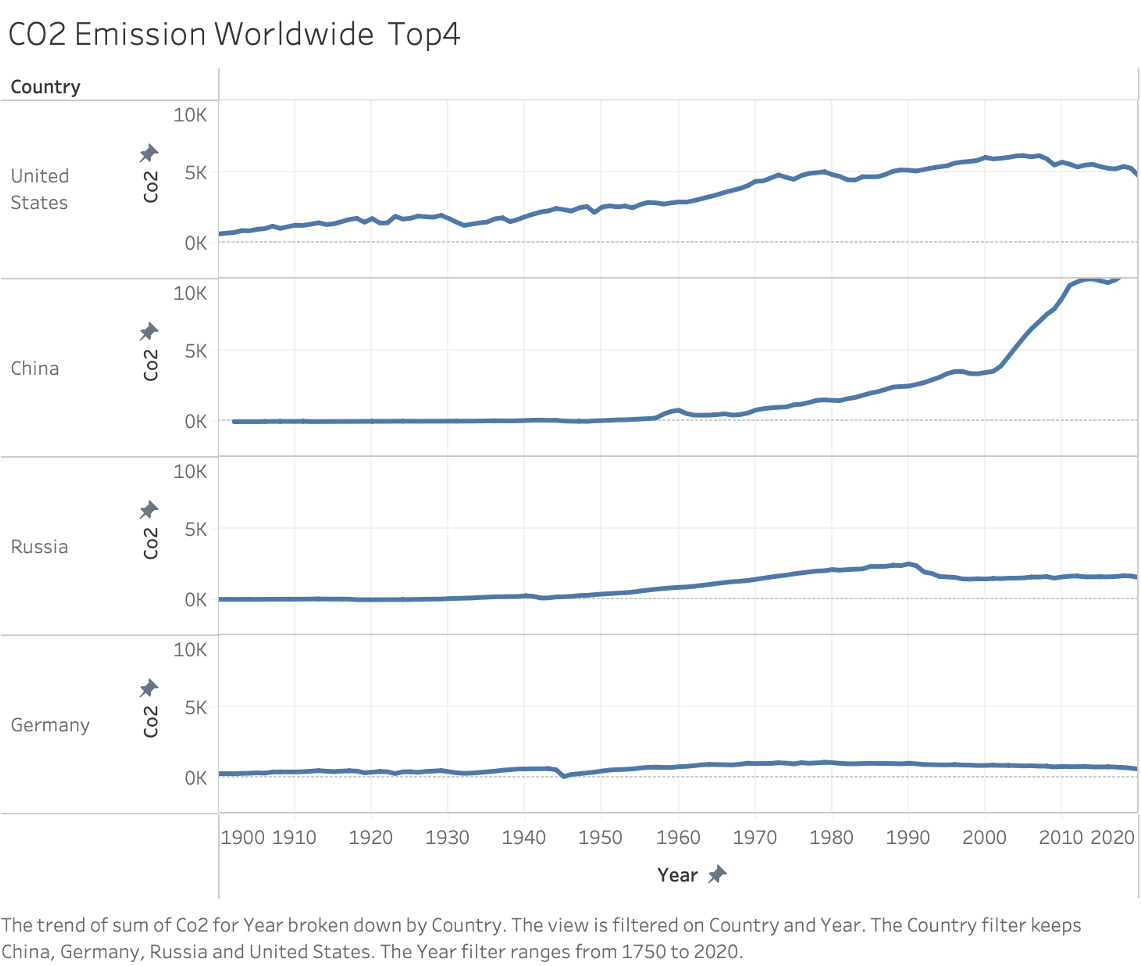

In [149]:
Image("CO2 Emission Worldwide Top4.png", width=800, height=600)

United States, China, Russia, Germany have been producing largest CO2 emission worldwide.

## CO2 Emissions Dashboard

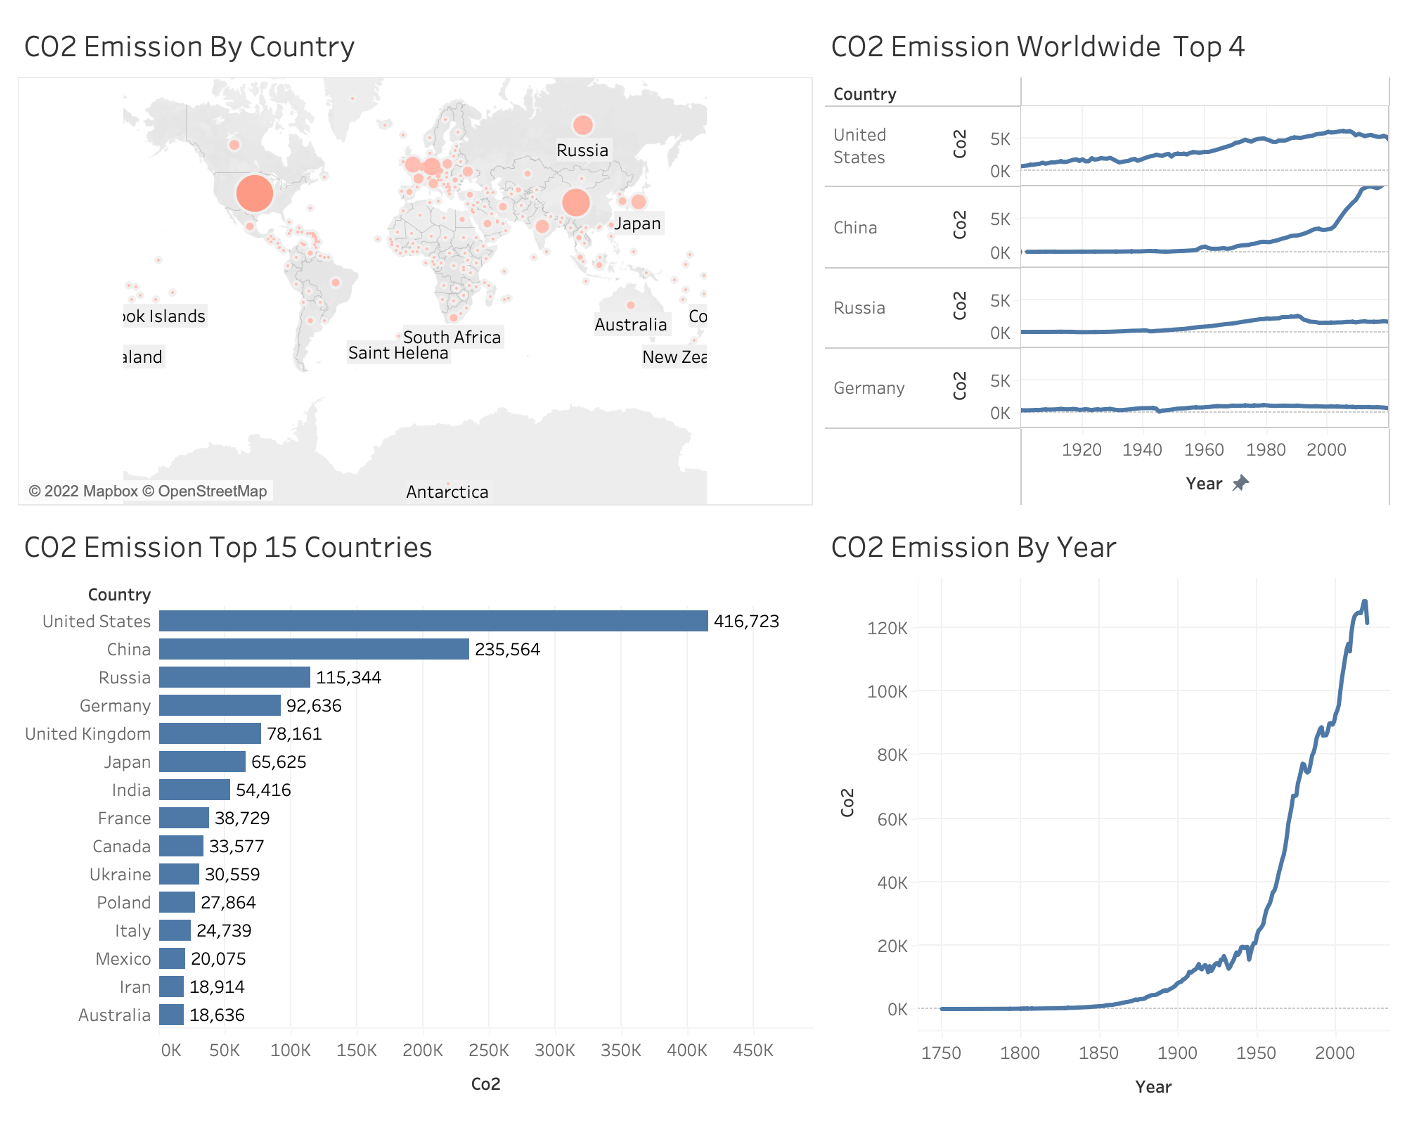

In [150]:
Image("CO2 Dashboard.png", width=800, height=600)

https://public.tableau.com/views/CO2EmissionTableau_16485157481660/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [151]:
# loading all data sets. Please make sure you upload data files to colab with these names before running these commands
energy_consumption=pd.read_csv('Energy consumption by sector.csv')
energy_prod=pd.read_csv('primary energy production.csv')
energy_prices=pd.read_csv('Average retail prices of electricity.csv')
carbon=pd.read_csv('CO2 emissions by source.csv')
renewable=pd.read_csv("Renewable Production and consumption by source.csv")

In [152]:
## Writing a function to generate a line plot
def lineplot(data,x,y, titles, xlab, ylab,hue_by = None, palette = None, 
             leg_labels = None, leg_loc = 0, 
             leg_cols = 2):
  sns.set_style("darkgrid")
  sns.set_context(rc = {"grid.linewidth": 0.6})
  plt.figure(figsize = (14,8))
  g = sns.lineplot(x = x, y = y,
              color = "blue", ci = None, alpha = 0.9, hue = hue_by, palette = palette)
  plt.axhline(y.mean(),
              color='green', ls = "--", alpha = 0.5)
  plt.yticks (rotation =90, size = 12)
  plt.xticks(rotation = 90, size = 12)
  plt.xlabel(xlab, fontfamily = "Times New Roman", size = 14, weight='bold')
  plt.ylabel(ylab, fontfamily = "Times New Roman", size = 14, weight='bold')
  plt.title(titles, fontfamily = "Times New Roman", 
            size = 22, weight = 'bold')
  sns.despine(left = True, right = True, top = True, bottom = True)
  plt.legend(loc = leg_loc, ncol = leg_cols, fontsize = 12, labels = leg_labels)
  return g

In [153]:
## Function for a barplot
def barplot(data,x,y, titles, xlab, ylab, hue_by = None, palette = None, leg_labels = None):
  sns.set_style("darkgrid")
  sns.set_context(rc = {"grid.linewidth": 0.6})
  plt.figure(figsize = (14,8))
  b = sns.barplot(x = x, y = y,
              color = "blue", ci = None, alpha = 0.9, hue = hue_by, palette = palette)
  plt.axhline(y.mean(),
              color='green', ls = "--", alpha = 0.5)
  plt.yticks (rotation = 90, size = 12)
  plt.xticks(rotation = 90, size = 12)
  plt.xlabel(xlab, fontfamily = "Times New Roman", size = 14, weight='bold')
  plt.ylabel(ylab, fontfamily = "Times New Roman", size = 14, weight='bold')
  plt.title(titles, fontfamily = "Times New Roman", 
            size = 22, weight = 'bold')
  sns.despine(left = True, right = True, top = True, bottom = True)
  plt.legend(loc = 0, ncol = 3, fontsize = 12, labels = leg_labels)
  return b

**Cleaning and Data Preparation**

In [154]:
## subsetting data for 2005 to 2020
start_date = 200501
end_date = 202012
energy_consumption = energy_consumption[(energy_consumption['YYYYMM'] >= start_date) &(energy_consumption['YYYYMM'] <= end_date)]
energy_prod = energy_prod[(energy_prod['YYYYMM'] >= start_date) & (energy_prod['YYYYMM'] <= end_date)]
energy_prices = energy_prices[(energy_prices['YYYYMM'] >= start_date) & (energy_prices['YYYYMM'] <= end_date)]
renewable = renewable[(renewable['YYYYMM'] >= start_date) & (renewable['YYYYMM'] <= end_date)]
carbon = carbon[(carbon['YYYYMM'] >= start_date) & (carbon['YYYYMM'] <= end_date)]

In [155]:
## Adding a month column
energy_consumption['MM'] = energy_consumption['YYYYMM'].astype("str").apply(lambda x : x[-2:])
energy_prod['MM'] = energy_prod['YYYYMM'].astype("str").apply(lambda x : x[-2:])
energy_prices['MM'] = energy_prices['YYYYMM'].astype("str").apply(lambda x : x[-2:])
renewable['MM'] = renewable['YYYYMM'].astype("str").apply(lambda x : x[-2:])
carbon['MM'] = carbon['YYYYMM'].astype("str").apply(lambda x : x[-2:])

In [156]:
# Removing rows where Month = 13
energy_consumption=energy_consumption.drop(energy_consumption[energy_consumption['MM'] == "13"].index)
energy_prod=energy_prod.drop(energy_prod[energy_prod['MM'] == "13"].index)
energy_prices=energy_prices.drop(energy_prices[energy_prices['MM'] == "13"].index)
renewable=renewable.drop(renewable[renewable['MM'] == "13"].index)
carbon=carbon.drop(carbon[carbon['MM'] == "13"].index)


In [157]:
## the command drops all rows where Value column has the value "Not Available" and "Not Applicable"
energy_prices.drop(energy_prices.index[energy_prices['Value']=="Not Available"], inplace= True)
energy_prices.drop(energy_prices.index[energy_prices['Value']=="Not Applicable"], inplace= True)

In [158]:
energy_consumption.drop(energy_consumption.index[energy_consumption['Value']=="Not Available"], inplace= True)
energy_consumption.drop(energy_consumption.index[energy_consumption['Value']=="Not Applicable"], inplace= True)

In [159]:
energy_prod.drop(energy_prod.index[energy_prod['Value']=="Not Available"], inplace= True)
energy_prod.drop(energy_prod.index[energy_prod['Value']=="Not Applicable"], inplace= True)

In [160]:
renewable.drop(renewable.index[renewable['Value']=="Not Available"], inplace= True)
renewable.drop(renewable.index[renewable['Value']=="Not Applicable"], inplace= True)

In [161]:
carbon.drop(carbon.index[carbon['Value']=="Not Available"], inplace= True)
carbon.drop(carbon.index[carbon['Value']=="Not Applicable"], inplace= True)

In [162]:
energy_prod['Value'] = energy_prod['Value'].astype("float")

In [163]:
energy_prod["date_year"] = energy_prod['YYYYMM'].astype("str").apply(lambda x: x[:4])

In [164]:
energy_consumption["date_year"] = energy_consumption['YYYYMM'].astype("str").apply(lambda x: x[:4])

In [165]:
energy_consumption_source_date = energy_consumption.groupby(["Description","date_year"], 
                                                            as_index = False).agg({"Value":"sum"})

In [166]:
## Energy Prices

In [167]:
energy_prices['date_year'] = energy_prices['YYYYMM'].astype("str").apply(lambda x: x[:4])

In [168]:
energy_prices['Value'] = energy_prices['Value'].astype("float")

In [169]:
energy_prices_source_date=energy_prices.groupby(['Description','date_year'], 
                                                as_index = False).agg({"Value":"mean"})

## Renewable Production and Consumption

In [170]:
renewable['date_year'] = renewable['YYYYMM'].astype("str").apply(lambda x: x[:4])

In [171]:
renewable['Value'] = renewable['Value'].astype("float")

In [172]:
renewable_source_date=renewable.groupby(['Description','date_year'], as_index = False).agg({"Value": "sum"})

In [173]:
carbon['date_year'] = carbon['YYYYMM'].astype("str").apply(lambda x: x[:4])

In [174]:
carbon_source_date=carbon.groupby(['Description','date_year'], 
                                  as_index = False).agg({"Value": "sum"})

Total Energy Production

In [175]:
# Aggregate Value column by source and date year combination
energy_prod_source_date = energy_prod.groupby(["Description","date_year"], as_index = False).agg({"Value":"sum"})

In [176]:
energy_prod_source_date_cleaned = energy_prod_source_date[(energy_prod_source_date['Description']!='Total Fossil Fuels Production') & (energy_prod_source_date['Description']!='Total Primary Energy Production') & (energy_prod_source_date['Description']!='Total Renewable Energy Production')]

In [177]:
total_energy_prod=energy_prod_source_date[(energy_prod_source_date['Description'] == 'Total Fossil Fuels Production') | (energy_prod_source_date['Description'] == 'Total Primary Energy Production') | (energy_prod_source_date['Description'] == 'Total Renewable Energy Production')]

# Carbon Emissions

No handles with labels found to put in legend.


<AxesSubplot:title={'center':' U.S. CO2 Emissions Have Stayed Closer to the Mean'}, xlabel='Year', ylabel='Million Metric Tons of CO2'>

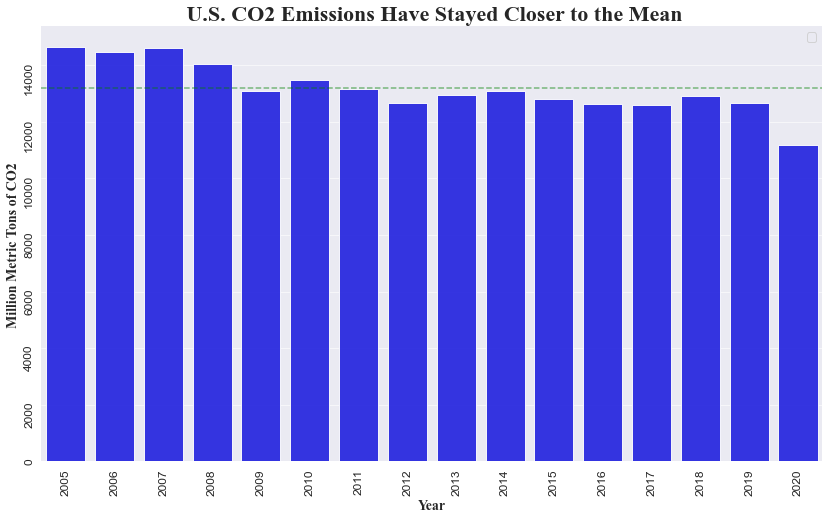

In [178]:
carbon_per_year=carbon_source_date.groupby("date_year", as_index = False).agg({"Value": sum})
barplot(data = carbon_per_year, x = carbon_per_year['date_year'], y = carbon_per_year['Value'],
       xlab = "Year", ylab = "Million Metric Tons of CO2", titles = " U.S. CO2 Emissions Have Stayed Closer to the Mean")

In [179]:
carbon_bar=carbon_source_date[(carbon_source_date['Description'] == "Petroleum, Excluding Biofuels, CO2 Emissions") | (carbon_source_date['Description'] == "Coal, Including Coal Coke Net Imports, CO2 Emissions") | (carbon_source_date['Description'] == "Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions")]

<AxesSubplot:title={'center':'Coal Emissions Decreased and Natural Gas Emissions Increased Over Time'}, xlabel='Year', ylabel='Million Metric Tons of CO2'>

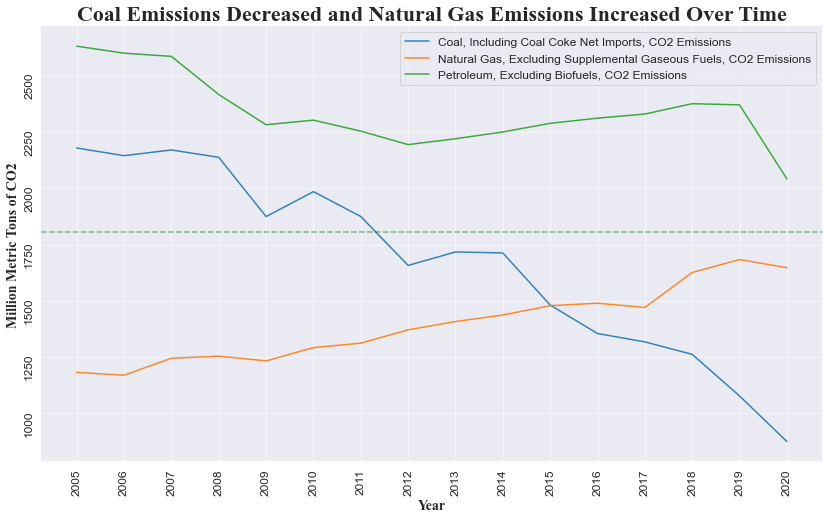

In [180]:
lineplot( data = carbon_bar, x = carbon_bar['date_year'],
        y = carbon_bar['Value'], hue_by = carbon_bar['Description'],
        xlab = "Year", ylab = "Million Metric Tons of CO2",
        titles = "Coal Emissions Decreased and Natural Gas Emissions Increased Over Time",
        leg_labels = carbon_bar['Description'].unique(), leg_loc = 0, leg_cols = 1)

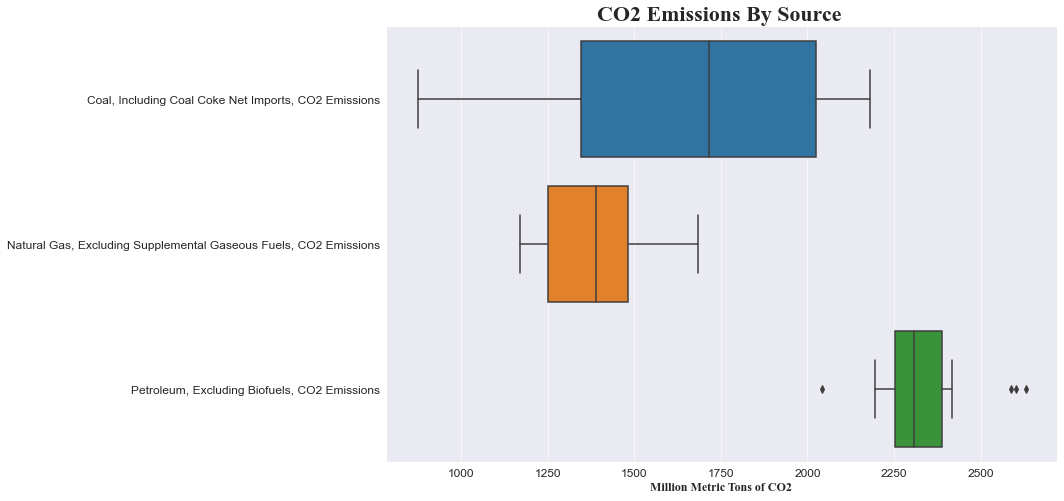

In [181]:
fig, ax = plt.subplots(figsize=(12,8))   
sns.set_style("darkgrid", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

sns.boxplot(data = carbon_bar, x ='Value', y='Description')
##plt.axvline(carbon_bar['Value'].mean(), color='black', ls = "--", alpha = 0.5)

plt.yticks (size = 12)
plt.xticks(size = 12)
plt.ylabel(None)
plt.xlabel("Million Metric Tons of CO2 ", fontfamily = "Times New Roman", size = 12, weight='bold')
plt.title("CO2 Emissions By Source ", fontfamily = "times new roman", weight='bold',
          size = 22)
sns.despine(left = True, right = True, top = True, bottom = False)

In [182]:
coal_value=energy_prod_source_date[energy_prod_source_date['Description'] == "Coal Production"]['Value']

In [183]:
retail_price_coal=energy_prices_source_date[energy_prices_source_date['Description'] == "Average Retail Price of Electricity, Total"]['Value']

In [184]:
primary_residential=energy_consumption_source_date[energy_consumption_source_date['Description'] == "Primary Energy Consumed by the Residential Sector"]['Value']

In [185]:
## Examining the relation between primary energy consumption by residential sector and Coal Production
primary_residential_consumption=energy_consumption_source_date[energy_consumption_source_date.Description == "Primary Energy Consumed by the Residential Sector"]['Value']

In [186]:
wind_costs_annual = pd.read_excel("renewable.xlsx", sheet_name = "wind costs")

In [187]:
sources=pd.read_excel("renewable.xlsx", sheet_name = "energy_production_by_source", header = 1,
                      index_col = 0)

# Solutions: Renewable Energy

In [188]:
solar_lcoe=pd.read_excel("renewable.xlsx", sheet_name = "solar LCOE", header = 1)

In [189]:
en_con = pd.read_csv ('Energy_consumption_by_source.csv')
en_pro = pd.read_csv ('Energy_production_by_source.csv')
elect = pd.read_csv ('Electricity_net_generation.csv')

In [190]:
##adding a month column
en_con['date_month'] = en_con['YYYYMM'].astype("str").apply(lambda x: x[-2:]) ##get last 4 char
en_pro['date_month'] = en_pro['YYYYMM'].astype("str").apply(lambda x: x[-2:]) ##get last 4 char
elect['date_month'] = elect['YYYYMM'].astype("str").apply(lambda x: x[-2:]) ##get last 4 char

In [191]:
# Removing rows where Month = 13
en_con=en_con.drop(en_con[en_con['date_month'] == "13"].index)
en_pro=en_pro.drop(en_pro[en_pro['date_month'] == "13"].index)
elect=elect.drop(elect[elect['date_month'] == "13"].index)

In [192]:
##subsetting data for 2005 to 2020
start_date = 200501
end_date = 202012

en_con = en_con[(en_con['YYYYMM'] >= start_date) & (en_con['YYYYMM'] <= end_date)].reset_index()
en_pro = en_pro[(en_pro['YYYYMM'] >= start_date) & (en_pro['YYYYMM'] <= end_date)].reset_index()
elect = elect[(elect['YYYYMM'] >= start_date) & (elect['YYYYMM'] <= end_date)].reset_index()

## Comparison of United States Total Energy Production and Consumption

In [193]:
##pre-processing en_pro
en_pro['Value'] = en_pro['Value'].astype("float")
en_pro['date_year'] = en_pro['YYYYMM'].astype("str").apply(lambda x: x[:4])
en_pro_srcdate = en_pro.groupby(['Description','date_year'], as_index = False).agg({"Value":"sum"})

print(en_pro_srcdate['Description'].unique()) ##finding unique description

['Biomass Energy Production' 'Coal Production' 'Crude Oil Production'
 'Geothermal Energy Production' 'Hydroelectric Power Production'
 'Natural Gas (Dry) Production' 'Natural Gas Plant Liquids Production'
 'Nuclear Electric Power Production' 'Solar Energy Production'
 'Total Fossil Fuels Production' 'Total Primary Energy Production'
 'Total Renewable Energy Production' 'Wind Energy Production']


In [194]:
total_pro = ['Total Fossil Fuels Production',
             'Nuclear Electric Power Production',
             'Total Renewable Energy Production']
total_en_pro_srcdate = en_pro_srcdate[en_pro_srcdate['Description'].isin(total_pro)] ##filtering by renewables
print(total_en_pro_srcdate['Description'].unique())

['Nuclear Electric Power Production' 'Total Fossil Fuels Production'
 'Total Renewable Energy Production']


In [195]:
##pre-processing en_con
en_con['Value'] = en_con['Value'].astype("float") ##change value type as float
en_con['date_year'] = en_con['YYYYMM'].astype("str").apply(lambda x: x[:4]) ##get first 4 char
en_con_srcdate = en_con.groupby(['Description','date_year'], as_index = False).agg({"Value":"sum"})
print(en_con_srcdate['Description'].unique()) ##finding unique descriptions

['Biomass Energy Consumption' 'Coal Consumption'
 'Geothermal Energy Consumption' 'Hydroelectric Power Consumption'
 'Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)'
 'Nuclear Electric Power Consumption'
 'Petroleum Consumption (Excluding Biofuels)' 'Solar Energy Consumption'
 'Total Fossil Fuels Consumption' 'Total Primary Energy Consumption'
 'Total Renewable Energy Consumption' 'Wind Energy Consumption']


In [196]:
total_con = ['Total Fossil Fuels Consumption',
             'Nuclear Electric Power Consumption',
             'Total Renewable Energy Consumption']
total_en_con_srcdate = en_con_srcdate[en_con_srcdate['Description'].isin(total_con)] ##filtering by renewables
print(total_en_con_srcdate['Description'].unique())

['Nuclear Electric Power Consumption' 'Total Fossil Fuels Consumption'
 'Total Renewable Energy Consumption']


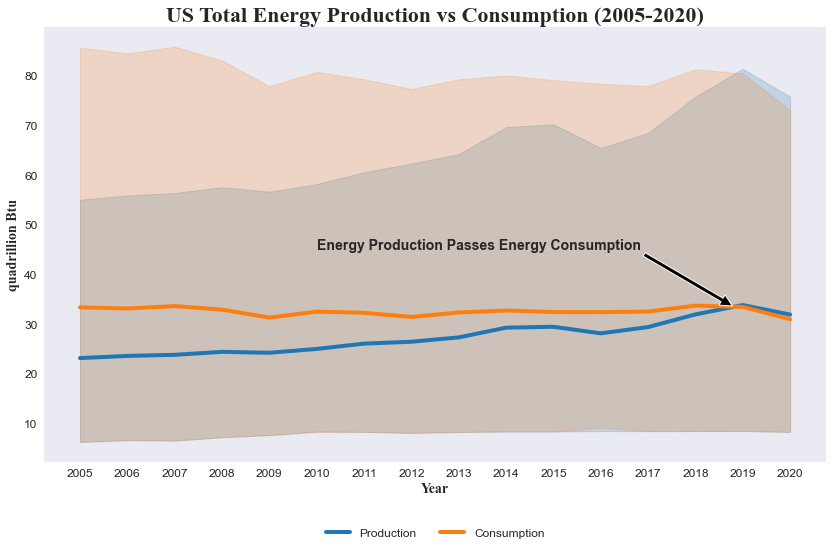

In [197]:
fig, ax = plt.subplots(figsize=(14,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

sns.lineplot(data = total_en_pro_srcdate,
    x='date_year', y='Value', linewidth = 4, label='Production') # first dataset
sns.lineplot(data = total_en_con_srcdate,
    x='date_year', y='Value', linewidth = 4,  label='Consumption') # second dataset

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=3,
    title=None, 
    frameon=False,
    fontsize = 12
)

ax.annotate('Energy Production Passes Energy Consumption', xy=(13.8, 33.5), xytext=(5, 45),
            arrowprops=dict(facecolor='black', shrink=0.01, width=4), size=14, weight='bold')

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("US Total Energy Production vs Consumption (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)

plt.show()

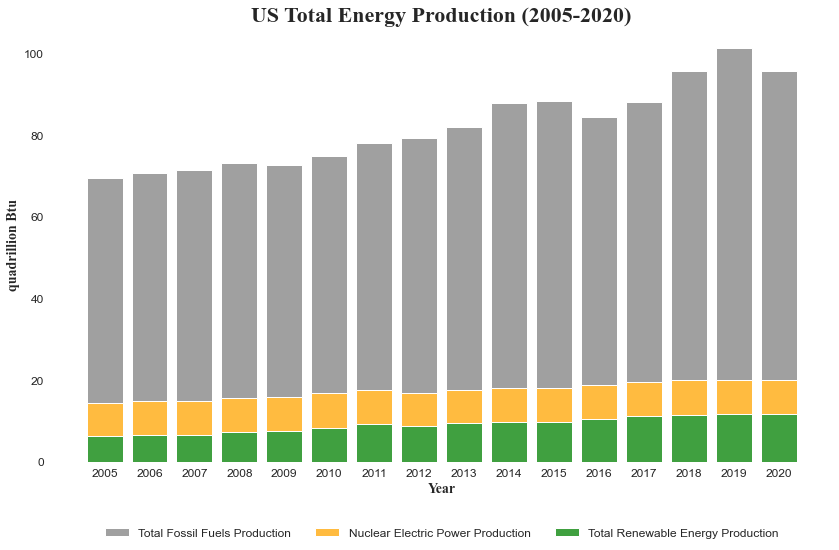

In [198]:
fig, ax = plt.subplots(figsize=(14,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

hue_order = ['Total Fossil Fuels Production',
             'Nuclear Electric Power Production',
             'Total Renewable Energy Production']

c = ["gray", "orange", "green"]

ax = sns.histplot(
    data = total_en_pro_srcdate,
    x='date_year',
    weights='Value',
    hue='Description',
    multiple='stack',
    edgecolor='white',
    shrink=0.8,
    hue_order = hue_order,
    palette = c)

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=3,
    title=None, 
    frameon=False,
    fontsize = 12
)

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("US Total Energy Production (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

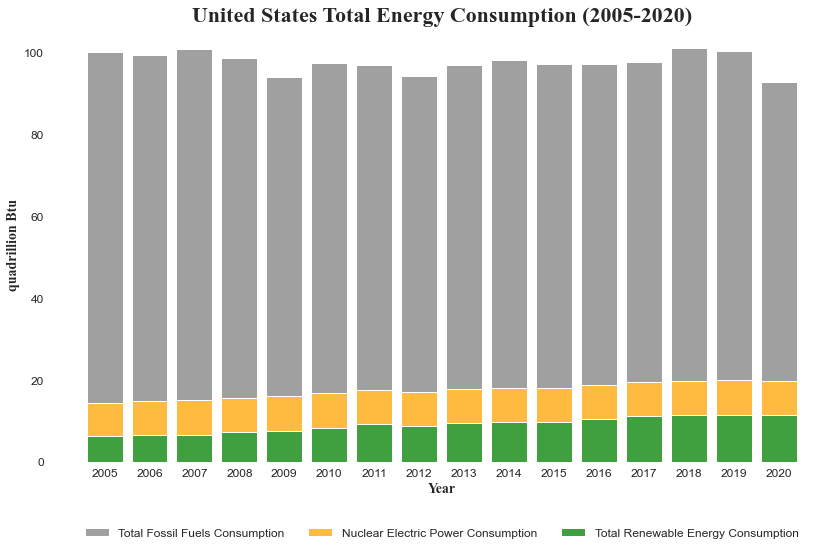

In [199]:
fig, ax = plt.subplots(figsize=(14,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

hue_order = ['Total Fossil Fuels Consumption',
             'Nuclear Electric Power Consumption',
             'Total Renewable Energy Consumption']

c = ["gray", "orange", "green"]

ax = sns.histplot(
    data = total_en_con_srcdate,
    x='date_year',
    weights='Value',
    hue='Description',
    multiple='stack',
    edgecolor='white',
    shrink=0.8,
    hue_order = hue_order,
    palette = c)

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=3,
    title=None, 
    frameon=False,
    fontsize = 12
)

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("United States Total Energy Consumption (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

## United States Total Energy Production and Consumption and by Renewable Energy Sources

In [200]:
renewables_pro = ['Hydroelectric Power Production', 'Geothermal Energy Production', 
             'Solar Energy Production', 'Wind Energy Production', 'Biomass Energy Production']

In [201]:
ren_pro_srcdate = en_pro_srcdate[en_pro_srcdate['Description'].isin(renewables_pro)] ##filtering by renewables
print(ren_pro_srcdate['Description'].unique())

['Biomass Energy Production' 'Geothermal Energy Production'
 'Hydroelectric Power Production' 'Solar Energy Production'
 'Wind Energy Production']


In [202]:
ren_pro_srcdate.head()

,Description,date_year,Value
0,Biomass Energy Production,2005,3.101186
1,Biomass Energy Production,2006,3.211514
2,Biomass Energy Production,2007,3.472078
3,Biomass Energy Production,2008,3.868251
4,Biomass Energy Production,2009,3.956618


In [203]:
renewables_con = ['Hydroelectric Power Consumption', 'Geothermal Energy Consumption', 
             'Solar Energy Consumption', 'Wind Energy Consumption', 'Biomass Energy Consumption']

In [204]:
ren_con_srcdate = en_con_srcdate[en_con_srcdate['Description'].isin(renewables_con)] ##filtering by renewables
print(ren_con_srcdate['Description'].unique())

['Biomass Energy Consumption' 'Geothermal Energy Consumption'
 'Hydroelectric Power Consumption' 'Solar Energy Consumption'
 'Wind Energy Consumption']


In [205]:
ren_con_srcdate.head()

,Description,date_year,Value
0,Biomass Energy Consumption,2005,3.113930
1,Biomass Energy Consumption,2006,3.262140
2,Biomass Energy Consumption,2007,3.484825
3,Biomass Energy Consumption,2008,3.851392
4,Biomass Energy Consumption,2009,3.940016


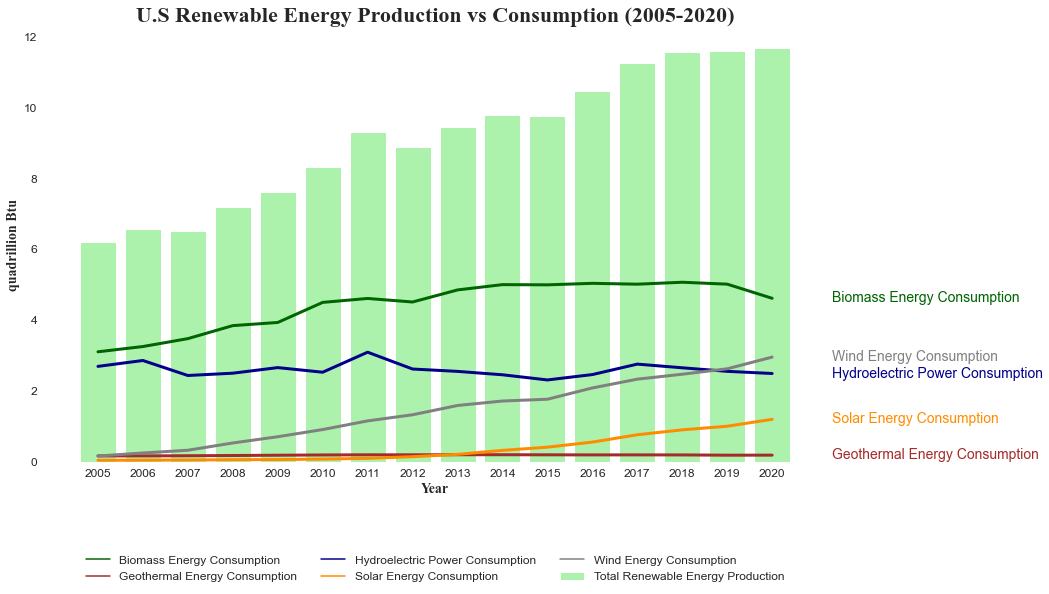

In [206]:
fig, ax = plt.subplots(figsize=(14,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

c = ["darkgreen", "brown", "darkblue", "darkorange", "gray"]

sns.histplot(
    data = ren_pro_srcdate,
    x='date_year',
    weights='Value',
    shrink=0.8,
    label='Total Renewable Energy Production',
    color='lightgreen')

sns.lineplot(data = ren_con_srcdate,
    x='date_year', y='Value', linewidth = 3, ci=None, hue='Description', palette=c) # second dataset
    
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.3),
    ncol=3,
    title=None, 
    frameon=False,
    fontsize = 12
)

for line, name in zip(ax.lines, sorted(set(ren_con_srcdate['Description']))):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")


plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("U.S Renewable Energy Production vs Consumption (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

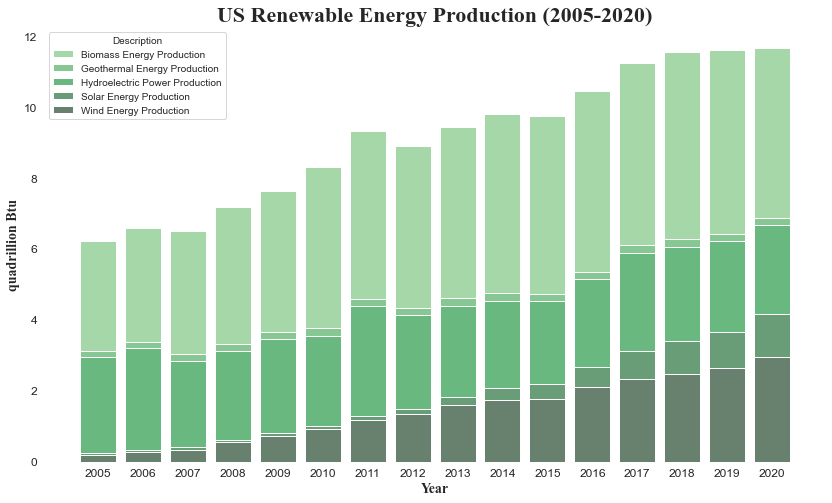

In [207]:
fig, ax = plt.subplots(figsize=(14,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

pal = sns.color_palette("Greens_d", 5)

ax = sns.histplot(
    data = ren_pro_srcdate,
    x='date_year',
    weights='Value',
    hue='Description',
    multiple='stack',
    edgecolor='white',
    shrink=0.8,
    palette = pal)

for line, name in zip(ax.lines, sorted(set(ren_pro_srcdate['Description']))):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("US Renewable Energy Production (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

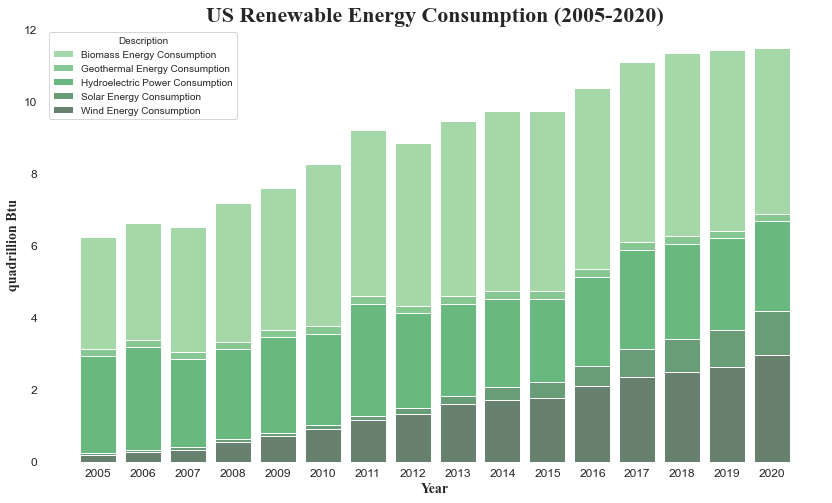

In [208]:
fig, ax = plt.subplots(figsize=(14,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

pal = sns.color_palette("Greens_d", 5)

ax = sns.histplot(
    data = ren_con_srcdate,
    x='date_year',
    weights='Value',
    hue='Description',
    multiple='stack',
    edgecolor='white',
    shrink=0.8,
    palette = pal)

for line, name in zip(ax.lines, sorted(set(ren_con_srcdate['Description']))):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("US Renewable Energy Consumption (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

## United States Electricity Generation By Energy Sources

In [209]:
elect.head()

,index,MSN,YYYYMM,Value,Column_Order,Description,Unit,date_month
0,440,CLETPUS,200501,177013.907,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,01
1,441,CLETPUS,200502,155818.014,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,02
2,442,CLETPUS,200503,163612.7,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,03
3,443,CLETPUS,200504,143083.239,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,04
4,444,CLETPUS,200505,153957.962,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,05


In [210]:
##pre-processing elect
elect['Value'] = elect['Value'].astype("float") ##change value type as float
elect['date_year'] = elect['YYYYMM'].astype("str").apply(lambda x: x[:4]) ##get first 4 char
elect_srcdate = elect.groupby(['Description','date_year'], as_index = False).agg({"Value":"sum"})

In [211]:
renewables_elect = ['Electricity Net Generation From Conventional Hydroelectric Power, All Sectors',
                  'Electricity Net Generation From Geothermal, All Sectors',
                  'Electricity Net Generation From Solar, All Sectors',
                  'Electricity Net Generation From Waste, All Sectors',
                  'Electricity Net Generation From Wind, All Sectors',
                  'Electricity Net Generation From Wood, All Sectors']

In [212]:
ren_filtered = elect_srcdate[elect_srcdate['Description'].isin(renewables_elect)]

In [213]:
elect_srcdate = ren_filtered.groupby('date_year')['Value'].sum().reset_index()\
.assign(Description='Total Renewable Net Generation').append(elect_srcdate, ignore_index=True)
##assigning renewable energy total to elect_srcdate

In [214]:
print(elect_srcdate['Description'].unique()) ##finding unique descriptions

['Total Renewable Net Generation'
 'Electricity Net Generation From Coal, All Sectors'
 'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
 'Electricity Net Generation From Geothermal, All Sectors'
 'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
 'Electricity Net Generation From Natural Gas, All Sectors'
 'Electricity Net Generation From Nuclear Electric Power, All Sectors'
 'Electricity Net Generation From Other Gases, All Sectors'
 'Electricity Net Generation From Petroleum, All Sectors'
 'Electricity Net Generation From Solar, All Sectors'
 'Electricity Net Generation From Waste, All Sectors'
 'Electricity Net Generation From Wind, All Sectors'
 'Electricity Net Generation From Wood, All Sectors'
 'Electricity Net Generation Total (including from sources not shown), All Sectors']


In [215]:
total_elect = ['Total Renewable Net Generation',
               'Electricity Net Generation From Coal, All Sectors',
               'Electricity Net Generation From Petroleum, All Sectors',
               'Electricity Net Generation From Natural Gas, All Sectors',
               'Electricity Net Generation From Nuclear Electric Power, All Sectors']

In [216]:
total_srcdate = elect_srcdate[elect_srcdate['Description'].isin(total_elect)] ##filtering by renewables
print(total_srcdate['Description'].unique())

['Total Renewable Net Generation'
 'Electricity Net Generation From Coal, All Sectors'
 'Electricity Net Generation From Natural Gas, All Sectors'
 'Electricity Net Generation From Nuclear Electric Power, All Sectors'
 'Electricity Net Generation From Petroleum, All Sectors']


In [217]:
total_srcdate.head()

,date_year,Value,Description
0,2005,357650.654,Total Renewable Net Generation
1,2006,385771.904,Total Renewable Net Generation
2,2007,352747.487,Total Renewable Net Generation
3,2008,380932.389,Total Renewable Net Generation
4,2009,417723.800,Total Renewable Net Generation


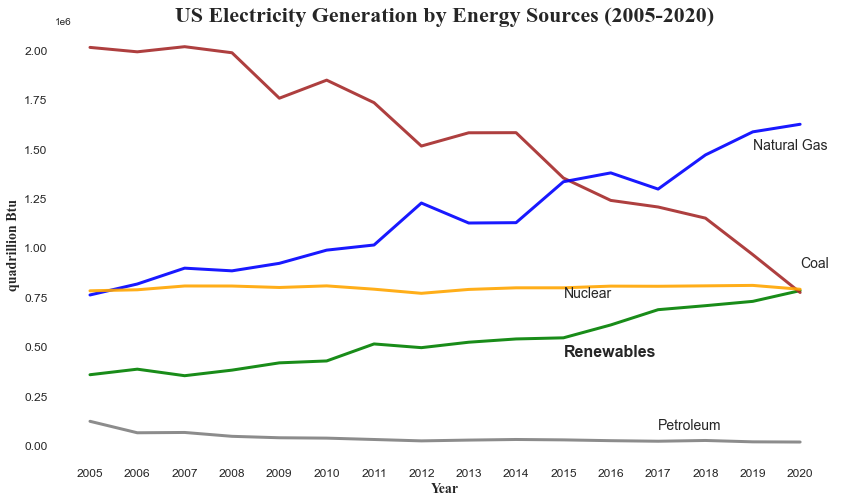

In [241]:
fig, ax = plt.subplots(figsize=(14,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

c = ["green", "brown", "blue", "orange", "gray"]

sns.lineplot(data = total_srcdate,
             x = total_srcdate['date_year'], 
             y = total_srcdate['Value'],
             color = 'blue',
             ci = None,
             alpha = 0.9,
             palette = c,
             hue = total_srcdate["Description"],
             ax = ax,
             linewidth=3,
             legend=False)

ax.annotate(text='Petroleum', xy=(12, 80000), xycoords='data', size=14)
ax.annotate(text='Renewables', xy=(10, 450000), xycoords='data', size=16, weight='bold')
ax.annotate(text='Nuclear', xy=(10, 750000), xycoords='data', size=14)
ax.annotate(text='Coal', xy=(15, 900000), xycoords='data', size=14)
ax.annotate(text='Natural Gas', xy=(14, 1500000), xycoords='data', size=14)


plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("US Electricity Generation by Energy Sources (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')


sns.despine(left = True, right = True, top = True, bottom = True)
##plt.legend(loc = 0, ncol = 2, fontsize = 6, labels = None)
plt.show()

In [219]:
renewables_elect = renewables_elect = ['Electricity Net Generation From Conventional Hydroelectric Power, All Sectors',
                  'Electricity Net Generation From Solar, All Sectors',
                  'Electricity Net Generation From Waste, All Sectors',
                  'Electricity Net Generation From Wind, All Sectors',
                  'Electricity Net Generation From Wood, All Sectors']
relect_srcdate = elect_srcdate[elect_srcdate['Description'].isin(renewables_elect)] ##filtering by renewables
print(relect_srcdate['Description'].unique())

['Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
 'Electricity Net Generation From Solar, All Sectors'
 'Electricity Net Generation From Waste, All Sectors'
 'Electricity Net Generation From Wind, All Sectors'
 'Electricity Net Generation From Wood, All Sectors']


In [220]:
relect_srcdate.head()

,date_year,Value,Description
32,2005,270321.257,Electricity Net Generation From Conventional H...
33,2006,289246.416,Electricity Net Generation From Conventional H...
34,2007,247509.975,Electricity Net Generation From Conventional H...
35,2008,254831.383,Electricity Net Generation From Conventional H...
36,2009,273445.095,Electricity Net Generation From Conventional H...


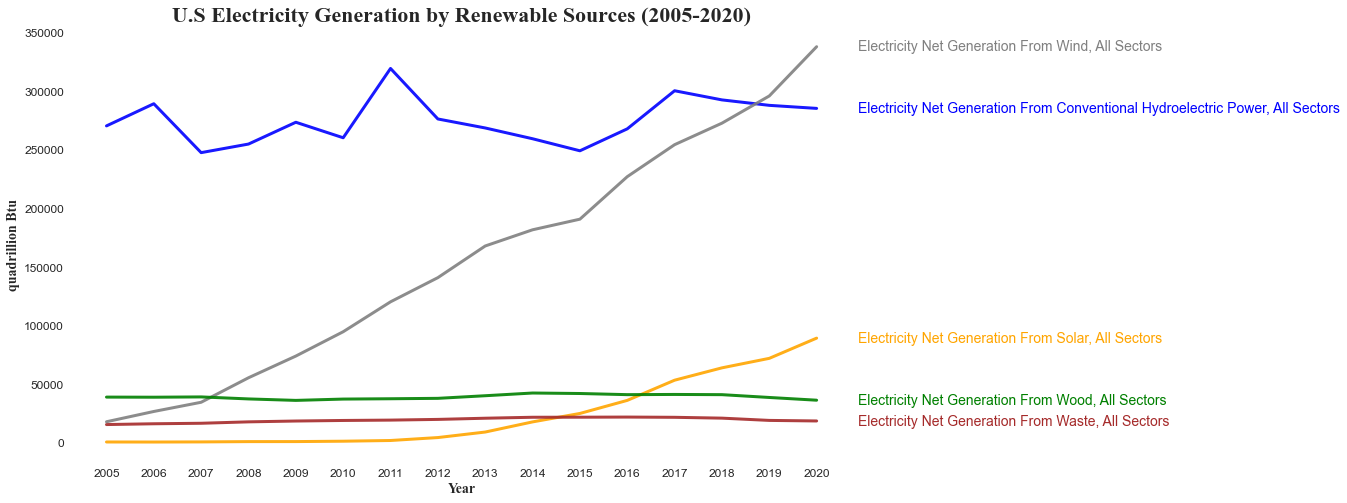

In [221]:
fig, ax = plt.subplots(figsize=(14,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

c = ["blue", "orange", "brown", "gray", "green"]

sns.lineplot(data = relect_srcdate,
             x = relect_srcdate['date_year'], 
             y = relect_srcdate['Value'],
             color = 'blue',
             ci = None,
             alpha = 0.9,
             hue = relect_srcdate['Description'],
             palette = c,
             ax = ax,
            legend=False,
            linewidth=3)

for line, name in zip(ax.lines, sorted(set(relect_srcdate['Description']))):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("U.S Electricity Generation by Renewable Sources (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

## Energy Prices

In [222]:
import warnings
warnings.filterwarnings("ignore")

#function to clean and organize the data so that it can be plotted
def organize_data(df):
  df = df[df['Value'] != 'Not Available']
  df = df[df['Value'] != 'Withheld']
  df = df[df['Value'] != 'Not Applicable']
  df['year'] = df['YYYYMM'].astype(str).str[:4]
  df[["Value", "year"]] = df[["Value", "year"]].apply(pd.to_numeric)
  df = df[['Value', 'year']]
  #df.set_index('year', inplace=True)
  df = df.loc[df['year'] >= 2010]
  df = df.groupby('year')['Value'].mean()
  return df


  #function to get min, max and mean of data points year wise
def get_max_min_mean(df):
  df = df[df['Value'] != 'Not Available']
  df = df[df['Value'] != 'Withheld']
  df = df[df['Value'] != 'Not Applicable']
  df['year'] = df['YYYYMM'].astype(str).str[:4]
  df[["Value", "year"]] = df[["Value", "year"]].apply(pd.to_numeric)
  df = df[['Value', 'year']]
  df = df.loc[df['year'] >= 2010]
  #df.set_index('year', inplace=True)
  df = df.groupby('year')['Value'].agg(Min='min', Max='max', Mean='mean')
  df.reset_index(inplace=True)
  return df

## Crude Oil Prices

In [223]:
crude_oil = pd.read_csv("crude_oil.csv")
crude_oil.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CODPUUS,194913,2.54,1,Crude Oil Domestic First Purchase Price,Dollars per Barrel
1,CODPUUS,195013,2.51,1,Crude Oil Domestic First Purchase Price,Dollars per Barrel
2,CODPUUS,195113,2.53,1,Crude Oil Domestic First Purchase Price,Dollars per Barrel
3,CODPUUS,195213,2.53,1,Crude Oil Domestic First Purchase Price,Dollars per Barrel
4,CODPUUS,195313,2.68,1,Crude Oil Domestic First Purchase Price,Dollars per Barrel


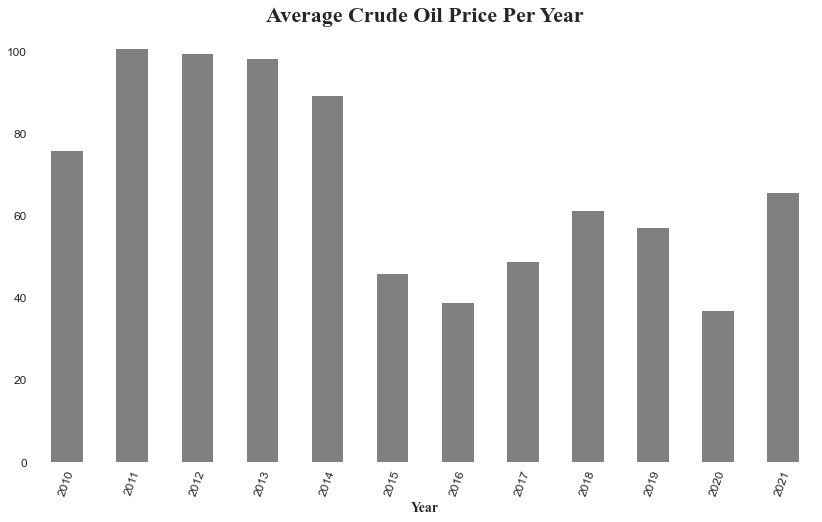

In [224]:
crude_df = organize_data(crude_oil)
fig, ax = plt.subplots(figsize=(14,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

crude_df.plot.bar(x="year", y="Value", rot=70, color='grey' )

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("Average Crude Oil Price Per Year", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

## Natural Gas Prices

In [225]:
natural_gas = pd.read_csv("naturalgas.csv")
natural_gas.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,NGWPUUS,194913,0.06,1,"Natural Gas Price, Wellhead",Dollars per Thousand Cubic Feet
1,NGWPUUS,195013,0.07,1,"Natural Gas Price, Wellhead",Dollars per Thousand Cubic Feet
2,NGWPUUS,195113,0.07,1,"Natural Gas Price, Wellhead",Dollars per Thousand Cubic Feet
3,NGWPUUS,195213,0.08,1,"Natural Gas Price, Wellhead",Dollars per Thousand Cubic Feet
4,NGWPUUS,195313,0.09,1,"Natural Gas Price, Wellhead",Dollars per Thousand Cubic Feet


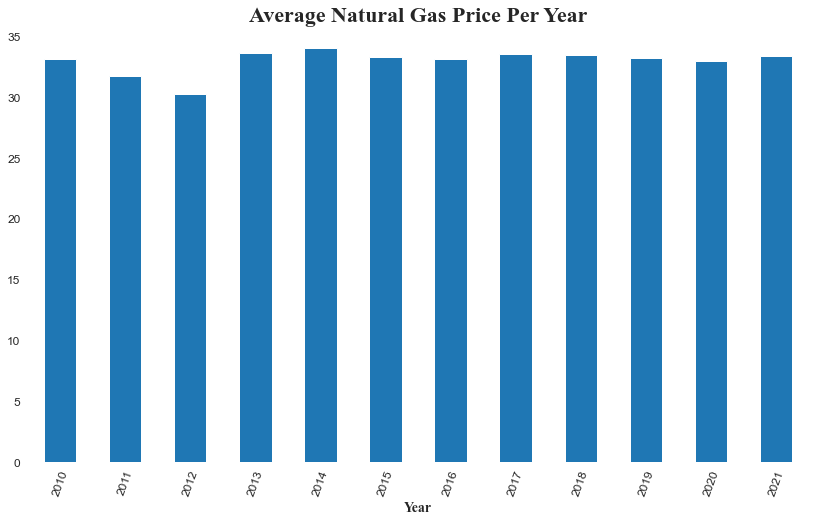

In [226]:
ng_df = organize_data(natural_gas)
fig, ax = plt.subplots(figsize=(14,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})
ng_df.plot.bar(x="year", y="Value", rot=70)


plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("Average Natural Gas Price Per Year", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

## Residual Oil Prices

In [227]:
residual_oil = pd.read_csv("FuelOIl.csv")
residual_oil.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,RBWHUUS,197813,0.293,1,"Refiner Price of Residual Fuel Oil, Sulfur Con...",Dollars per Gallon Excluding Taxes
1,RBWHUUS,197913,0.45,1,"Refiner Price of Residual Fuel Oil, Sulfur Con...",Dollars per Gallon Excluding Taxes
2,RBWHUUS,198013,0.608,1,"Refiner Price of Residual Fuel Oil, Sulfur Con...",Dollars per Gallon Excluding Taxes
3,RBWHUUS,198113,0.748,1,"Refiner Price of Residual Fuel Oil, Sulfur Con...",Dollars per Gallon Excluding Taxes
4,RBWHUUS,198201,0.718,1,"Refiner Price of Residual Fuel Oil, Sulfur Con...",Dollars per Gallon Excluding Taxes


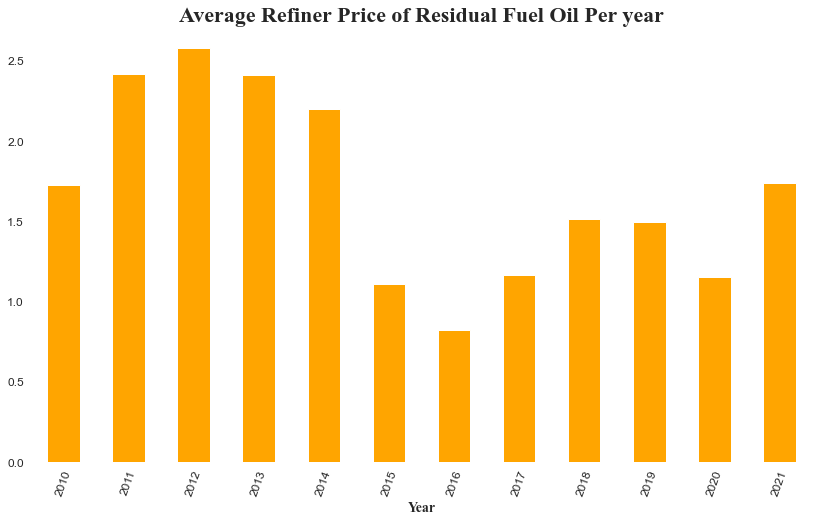

In [228]:
rs_df = organize_data(residual_oil)
fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})
rs_df.plot.bar(x="year", y="Value", rot=70, 
               color = 'orange')

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("Average Refiner Price of Residual Fuel Oil Per year", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

## Petroleum Prices

In [229]:
petroleum = pd.read_csv("Petro.csv")

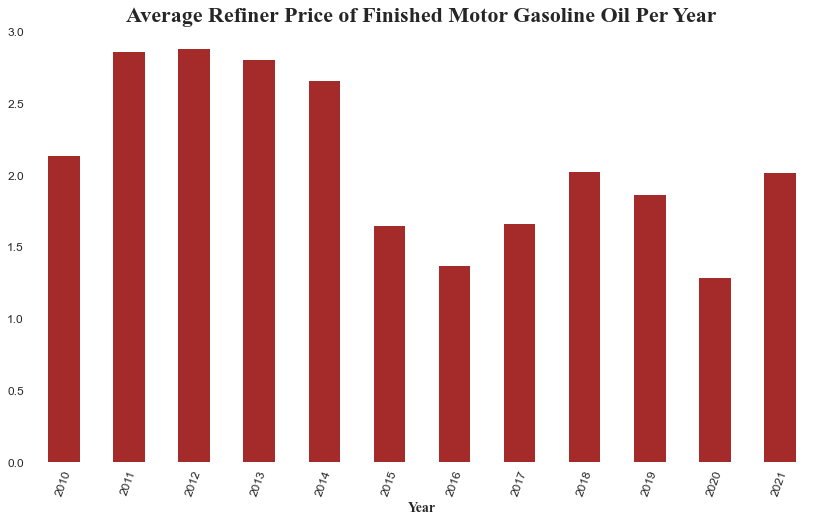

In [230]:
petrol_df = organize_data(petroleum)
fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})
petrol_df.plot.bar(x="year", y="Value", rot=70, 
                 color = 'brown')

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("Average Refiner Price of Finished Motor Gasoline Oil Per Year", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

## Eletricity Prices

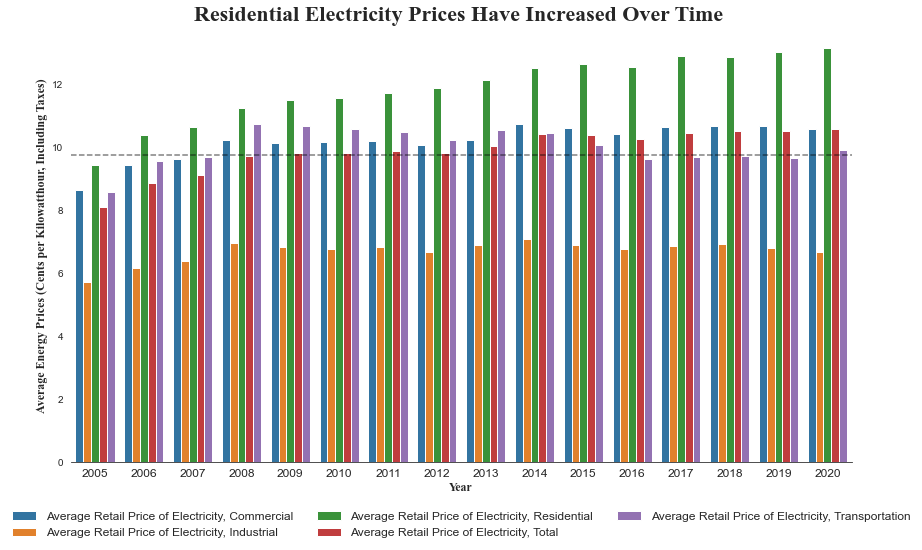

In [231]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

sns.barplot(x = energy_prices_source_date['date_year'], y = energy_prices_source_date['Value'], 
            ci = None, hue = energy_prices_source_date['Description'])

plt.axhline(energy_prices_source_date['Value'].mean(),
            color='black', ls = "--", alpha = 0.5)

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=3,
    title=None, 
    frameon=False,
    fontsize = 12
)

plt.xticks(size = 12)
plt.xlabel("Year", fontfamily = "Times New Roman", size = 12, weight='bold')
plt.ylabel("Average Energy Prices (Cents per Kilowatthour, Including Taxes) ", fontfamily = "Times New Roman", size = 12, weight='bold')
plt.title("Residential Electricity Prices Have Increased Over Time ", fontfamily = "Times New Roman", 
          size = 22, weight='bold')
sns.despine(left = True, right = True, top = True, bottom = False)
plt.show()

In [232]:
electricity = pd.read_csv("Electri.csv")

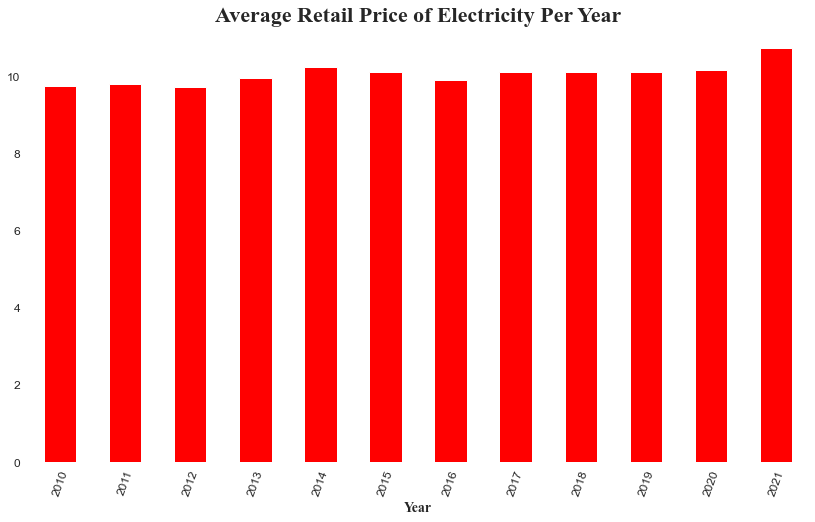

In [233]:
e_df = organize_data(electricity)

fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

e_df.plot.bar(x="year", y="Value", 
              rot=70, color = 'red')

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("Average Retail Price of Electricity Per Year", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

## Wind Energy Cost

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Wind Energy Cost'}, xlabel='Year', ylabel='USD/Kwh'>

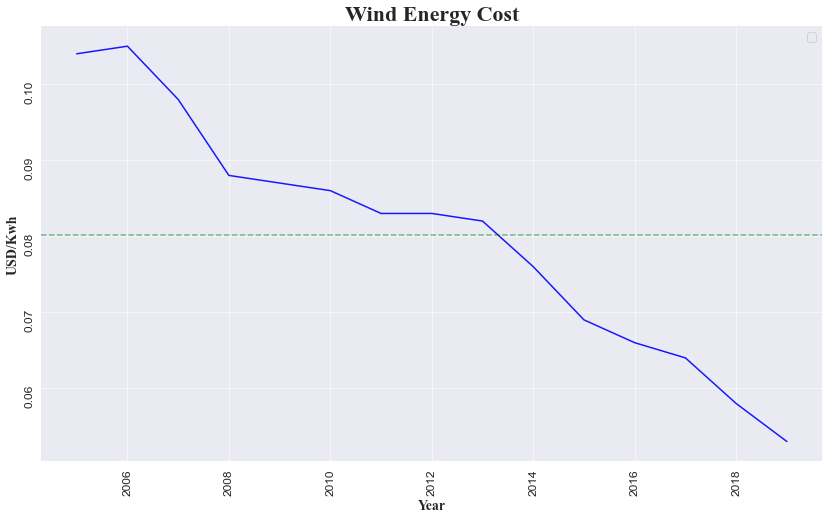

In [234]:
lineplot(data = wind_costs_annual, x = wind_costs_annual['Year'], 
         y = wind_costs_annual['Weighted average'], titles = "Wind Energy Cost",
         xlab = "Year", ylab = "USD/Kwh")

In [235]:
data = pd.read_excel("statistic.xlsx","Data")
data = data.drop(data.columns[[0]], axis=1)
data = data.iloc[4: , :]
data.columns = ['Year', 'Deaths attributable to air pollution']
data.set_index('Year', inplace=True)
data['Deaths attributable to air pollution'] = data['Deaths attributable to air pollution'].astype('int')
data = data[::-1]

In [236]:
## Solar installation costs
solar_installed_costs=pd.read_excel("renewable.xlsx", sheet_name = "solar", header = 0)

## Solar Energy Cost

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Solar Costs Have Drastically Declined'}, xlabel='Year', ylabel='Weighted average installed cost (2019 USD/kW)'>

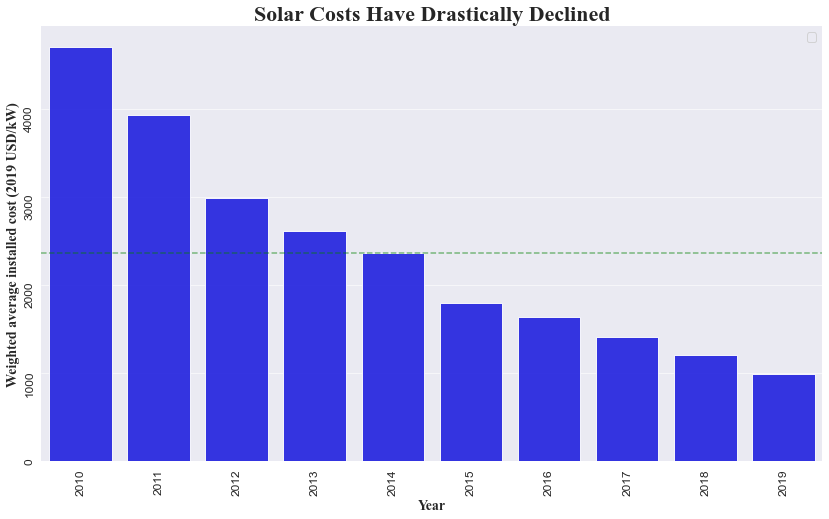

In [237]:
barplot(data = solar_installed_costs, x = solar_installed_costs['Year'],
         y = solar_installed_costs['Weighted average installed cost (2019 USD/kW)'],
         titles = "Solar Costs Have Drastically Declined", xlab  = "Year",
         ylab = 'Weighted average installed cost (2019 USD/kW)')

## Deaths By Air Pollution

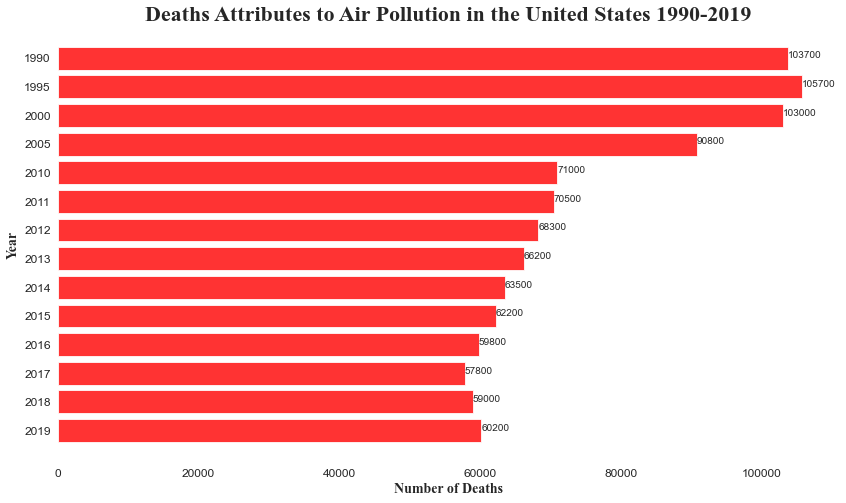

In [240]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

ax.barh(data.index, data['Deaths attributable to air pollution'], color='red', alpha=0.8)

for index, value in enumerate(data['Deaths attributable to air pollution']):
    plt.text(value, index,
             str(value))

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Number of Deaths', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title('Deaths Attributes to Air Pollution in the United States 1990-2019', fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()